In [1]:
#-------- Load Required Libraries-----------#

In [2]:
import pandas as pd
# import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib_venn as venn
from datetime import date
from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
#---- Important to install below required libraries-----#
#-------           pip install voila               -----#

In [4]:
# voila - 0.5.5
# To check voila installed or not


# import voila
# print(voila.__version__)

# if voila installed not working check below library version (7.11.0)


# import nbconvert
# print(nbconvert.__version__)


## Asset Management System

In [5]:
#---------ER Diagram below ----------#

In [6]:
# Image(filename='Downloads/schemabms.png')

In [7]:
"""
Age calculation done from DOB.
Extra Age column is added in customers data.
"""

def calculate_age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

customers = pd.read_excel("Downloads/customers.xlsx")
customers['age'] = customers['DATEOFBIRTH'].apply(calculate_age)


# customers

In [8]:
accounts = pd.read_excel("Downloads/accounts.xlsx")


# accounts

In [9]:
transactions = pd.read_excel("Downloads/transactions.xlsx")


# transactions

In [10]:
loans = pd.read_excel("Downloads/loans.xlsx")


# loans

In [11]:
investment_accounts = pd.read_excel("Downloads/investment_accounts.xlsx")
investment_accounts["investment_accounttype"] = investment_accounts["ACCOUNTTYPE"]


# investment_accounts

In [12]:
"""
MF Investment end date is considered as today's date.
MF Investment start date is considered as INVESTMENTDATE of Mutual Fund data.
From above dates investment in years and days is calculated.
Columns added are mf_investment_end_date, mf_investment_start_date, mf_investment_days, mf_tenure
"""

mutual_funds = pd.read_excel("Downloads/mutual_funds.xlsx")
mutual_funds["mf_investment_end_date"] = pd.Timestamp.now()
mutual_funds['mf_investment_start_date'] = pd.to_datetime(mutual_funds['INVESTMENTDATE'])
mutual_funds['mf_investment_end_date'] = pd.to_datetime(mutual_funds['mf_investment_end_date'])
mutual_funds['mf_investment_days'] = mutual_funds['mf_investment_end_date'] - mutual_funds['mf_investment_start_date']
mutual_funds['mf_tenure'] = mutual_funds['mf_investment_days'] / np.timedelta64(1, 'Y')
mutual_funds['mf_investment_days'] = mutual_funds['mf_investment_days'].dt.days


# mutual_funds

In [13]:
"""
FD Investment end date is considered as today's date.
FD Investment start date is considered as MATURITYDATE of Fixed Deposit data as could not find other date.
From above dates investment in years and days is calculated.
Columns added are fd_investment_end_date, fd_investment_start_date, fd_investment_days, fd_tenure
"""

fixed_deposits = pd.read_excel("Downloads/fixed_deposits.xlsx")
fixed_deposits["fd_investment_end_date"] = pd.Timestamp.now()
fixed_deposits['fd_investment_start_date'] = pd.to_datetime(fixed_deposits['MATURITYDATE'])
fixed_deposits['fd_investment_end_date'] = pd.to_datetime(fixed_deposits['fd_investment_end_date'])
fixed_deposits['fd_investment_days'] = fixed_deposits['fd_investment_end_date'] - fixed_deposits['fd_investment_start_date']
fixed_deposits['fd_tenure'] = fixed_deposits['fd_investment_days'] / np.timedelta64(1, 'Y')
fixed_deposits['fd_investment_days'] = fixed_deposits['fd_investment_days'].dt.days


# fixed_deposits

In [14]:
"""
Stock Investment end date is considered as today's date.
Stock Investment start date is considered as PURCHASEDATE of Stock data.
From above dates investment in years and days is calculated.
Columns added are stock_investment_end_date, stock_investment_start_date, stock_investment_days, stock_tenure
"""

stocks = pd.read_excel("Downloads/stocks.xlsx")
stocks["stock_investment_end_date"] = pd.Timestamp.now()
stocks['stock_investment_start_date'] = pd.to_datetime(stocks['PURCHASEDATE'])
stocks['stock_investment_end_date'] = pd.to_datetime(stocks['stock_investment_end_date'])
stocks['stock_investment_days'] = stocks['stock_investment_end_date'] - stocks['stock_investment_start_date']
stocks['stock_tenure'] = stocks['stock_investment_days'] / np.timedelta64(1, 'Y')
stocks['stock_investment_days'] = stocks['stock_investment_days'].dt.days


# stocks

In [15]:
#----------------Base data calculation starts-------------#

In [16]:
customers_accounts = pd.merge(customers, accounts, how ="inner")
# for outer join use below code pd.merge(customers, accounts, how ="outer",indicator="customers_accounts")
# customers_accounts['customer_have_account'] = customers_accounts['customers_accounts'].apply(lambda x: 'Yes' if x == 'both' else 'No')


# customers_accounts

In [17]:
# total_customers_having_accounts = customers_accounts['CUSTOMERID'].nunique()
# print("Total Customers",total_customers_having_accounts)

# total_customers_having_investment_accounts = investment_accounts['CUSTOMERID'].nunique()
# print("Total Customers with Investments Account",total_customers_having_investment_accounts)

# summary_of_customers_having_investment_accounts = investment_accounts.groupby("ACCOUNTTYPE")["CUSTOMERID"].nunique()
# print("Customers with Investments Account",summary_of_customers_having_investment_accounts)

In [18]:
#---------------Customers and Investments------------------#

In [19]:
customers_accounts_transactions = pd.merge(customers_accounts, transactions, how ="inner")
# for outer join use below code pd.merge(customers_accounts, transactions, how ="outer",indicator="customers_accounts_transactions")
# customers_accounts_transactions['customer_have_account_and_transaction'] = customers_accounts_transactions['customers_accounts_transactions'].apply(lambda x: 'Yes' if x == 'both' else 'No')


# customers_accounts_transactions

In [20]:
customers_with_transactions = customers_accounts_transactions['CUSTOMERID'].nunique()


# print("customers_with_transactions - ",customers_with_transactions)

In [21]:
customers_loans = pd.merge(customers, loans, how ="inner")
# for outer join use below code pd.merge(customers, loans, how ="outer",indicator="customers_loans")
# customers_loans['customer_have_loan'] = customers_loans['customers_loans'].apply(lambda x: 'Yes' if x == 'both' else 'No')


# customers_loans

In [22]:
customers_with_loan = customers_loans['CUSTOMERID'].nunique()


# print("customers_with_loan - ",customers_with_loan )

In [23]:
customers_account_balance = customers_accounts.groupby(by=['CUSTOMERID']).agg({'ACCOUNTBALANCE': 'sum'}).rename(columns={'ACCOUNTBALANCE': 'cust_account_balance'})


# print("customers_account_balance")
# customers_account_balance

In [24]:
customers_accounts = pd.merge(customers_accounts, customers_account_balance, how ="inner", on = "CUSTOMERID")


# print("customers_accounts")
# customers_accounts

In [25]:
customers_investment_accounts = pd.merge(customers_accounts, investment_accounts, how ="inner", on = "CUSTOMERID")
# for outer join use below code pd.merge(customers, investment_accounts, how ="outer",indicator="customers_investment_accounts")
# customers_investment_accounts['customer_have_investment_account'] = customers_investment_accounts['customers_investment_accounts'].apply(lambda x: 'Yes' if x == 'both' else 'No')


# print("customers_investment_accounts")
# customers_investment_accounts

In [26]:
customers_with_investment_account = customers_investment_accounts['CUSTOMERID'].nunique()


# print("customers_with_investment_account",customers_with_investment_account)

In [27]:
customers_investment_accounts_in_MF = customers_investment_accounts[customers_investment_accounts["ACCOUNTTYPE_y"]== "Mutual Funds"]
customers_investment_accounts_in_MF = pd.merge(customers_investment_accounts_in_MF, mutual_funds, how ="inner", on = "INVESTMENTACCOUNTID")


# print("customers_investment_accounts_in_MF")
# customers_investment_accounts_in_MF

In [28]:
MF_customers_investment_count = customers_investment_accounts_in_MF.groupby('FUNDNAME')['CUSTOMERID'].nunique().sort_values(ascending = False)


# print("Mutual Fund Investments Summary")
# print(MF_customers_investment_count)


MF_investment_top_10 = MF_customers_investment_count[0:10].sort_values(ascending = True)

In [29]:
customers_investment_accounts_in_FD = customers_investment_accounts[customers_investment_accounts["ACCOUNTTYPE_y"]== "Fixed Deposits"]
customers_investment_accounts_in_FD = pd.merge(customers_investment_accounts_in_FD, fixed_deposits, how ="inner", on = "INVESTMENTACCOUNTID")


# customers_investment_accounts_in_FD

In [30]:
FD_customers_investment_count = customers_investment_accounts_in_FD.groupby('INTERESTPAYMENTFREQUENCY')['CUSTOMERID'].nunique().sort_values(ascending = False)

# print("Fixed Deposit Investments Summary")
# print(FD_customers_investment_count)

FD_investment_top_10 = FD_customers_investment_count[0:10].sort_values(ascending = True)

In [31]:
customers_investment_accounts_in_stocks = customers_investment_accounts[customers_investment_accounts["ACCOUNTTYPE_y"]== "Stocks"]
customers_investment_accounts_in_stocks = pd.merge(customers_investment_accounts_in_stocks, stocks, how ="inner", on = "INVESTMENTACCOUNTID")


# customers_investment_accounts_in_stocks

In [32]:
stocks_customers_investment_count = customers_investment_accounts_in_stocks.groupby('STOCKNAME')['CUSTOMERID'].nunique().sort_values(ascending = False)


# print("Stocks Investments Summary")
# print(stocks_customers_investment_count)


stocks_investment_top_10 = stocks_customers_investment_count[0:10].sort_values(ascending = True)

In [33]:
# customers_investment_accounts_in_stocks['CUSTOMERID'].nunique()

In [34]:
#-------------------------------------------Data Summary Starts------------------------------------------#

In [35]:
initial_summary = customers[["CUSTOMERID","GENDER"]].drop_duplicates()


# initial_summary

In [36]:
mutualfund_customers = customers_investment_accounts_in_MF['CUSTOMERID'].nunique()


# mutualfund_customers

In [37]:
initial_summary_mf = customers_investment_accounts_in_MF[["CUSTOMERID"]].drop_duplicates()
initial_summary_mf["mf_customer"] = 1


# initial_summary_mf

In [38]:
fixeddeposit_customers = customers_investment_accounts_in_FD['CUSTOMERID'].nunique()


# fixeddeposit_customers

In [39]:
initial_summary_fd = customers_investment_accounts_in_FD[["CUSTOMERID"]].drop_duplicates()
initial_summary_fd["fd_customer"] = 1


# initial_summary_fd

In [40]:
stock_customers = customers_investment_accounts_in_stocks['CUSTOMERID'].nunique()


# stock_customers

In [41]:
initial_summary_stock = customers_investment_accounts_in_stocks[["CUSTOMERID"]].drop_duplicates()
initial_summary_stock["stock_customer"] = 1


# initial_summary_stock

In [42]:
initial_summary = pd.merge(initial_summary,initial_summary_mf, how = "left", on =  "CUSTOMERID")
initial_summary = pd.merge(initial_summary,initial_summary_fd, how = "left", on =  "CUSTOMERID")
initial_summary = pd.merge(initial_summary,initial_summary_stock, how = "left", on =  "CUSTOMERID")


# initial_summary

In [43]:

# summary_of_customers_having_investment_accounts = initial_summary.count(axis=0)
# summary_of_customers_having_investment_accounts = summary_of_customers_having_investment_accounts[["mf_customer","fd_customer","stock_customer"]]
# ax = summary_of_customers_having_investment_accounts.plot(kind="bar", title="Number of Customers by Account Type",rot = 0)
# plt.bar_label(ax.containers[0])
# plt.tight_layout()
# plt.show;


In [44]:

# gender_count = initial_summary.groupby('GENDER')['CUSTOMERID'].count()
# total_customers = gender_count.sum()
# total_series = pd.Series([total_customers], index=['Total'])
# gender_count = pd.concat([gender_count, total_series])

# ax = gender_count.plot(kind='bar', color=['indianred', 'navy', 'teal'] , rot = 0,alpha = 0.7)
# plt.title('Number of Customers by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Number of Customers')
# plt.bar_label(ax.containers[0])
# plt.gca().invert_xaxis()
# plt.show()


In [45]:
set_mf_customer = initial_summary[initial_summary["mf_customer"]==1]
set_mf_customer = set_mf_customer[["CUSTOMERID"]]
set_fd_customer = initial_summary[initial_summary["fd_customer"]==1]
set_fd_customer = set_fd_customer[["CUSTOMERID"]]
set_stock_customer = initial_summary[initial_summary["stock_customer"]==1]
set_stock_customer = set_stock_customer[["CUSTOMERID"]]

In [46]:
set_mf_customer = set(set_mf_customer["CUSTOMERID"])
set_fd_customer = set(set_fd_customer["CUSTOMERID"])
set_stock_customer = set(set_stock_customer["CUSTOMERID"])

In [47]:

# set1 = set_mf_customer
# set2 = set_fd_customer
# set3 = set_stock_customer
# vd = venn.venn3([set1, set2, set3], set_labels=['Mutual Fund', 'Fixed Deposit', 'Stocks'],set_colors=('teal', 'lightcoral', 'darkblue'),alpha = 0.7)
# plt.show()


In [48]:

gender_count = initial_summary.groupby('GENDER')['CUSTOMERID'].count()
total_customers = gender_count.sum()
total_series = pd.Series([total_customers], index=['Total'])
gender_count = pd.concat([gender_count, total_series])

summary_of_customers_having_investment_accounts = initial_summary.count(axis=0)
summary_of_customers_having_investment_accounts = summary_of_customers_having_investment_accounts[["mf_customer","fd_customer","stock_customer"]]

set1 = set_mf_customer
set2 = set_fd_customer
set3 = set_stock_customer


### Know your data

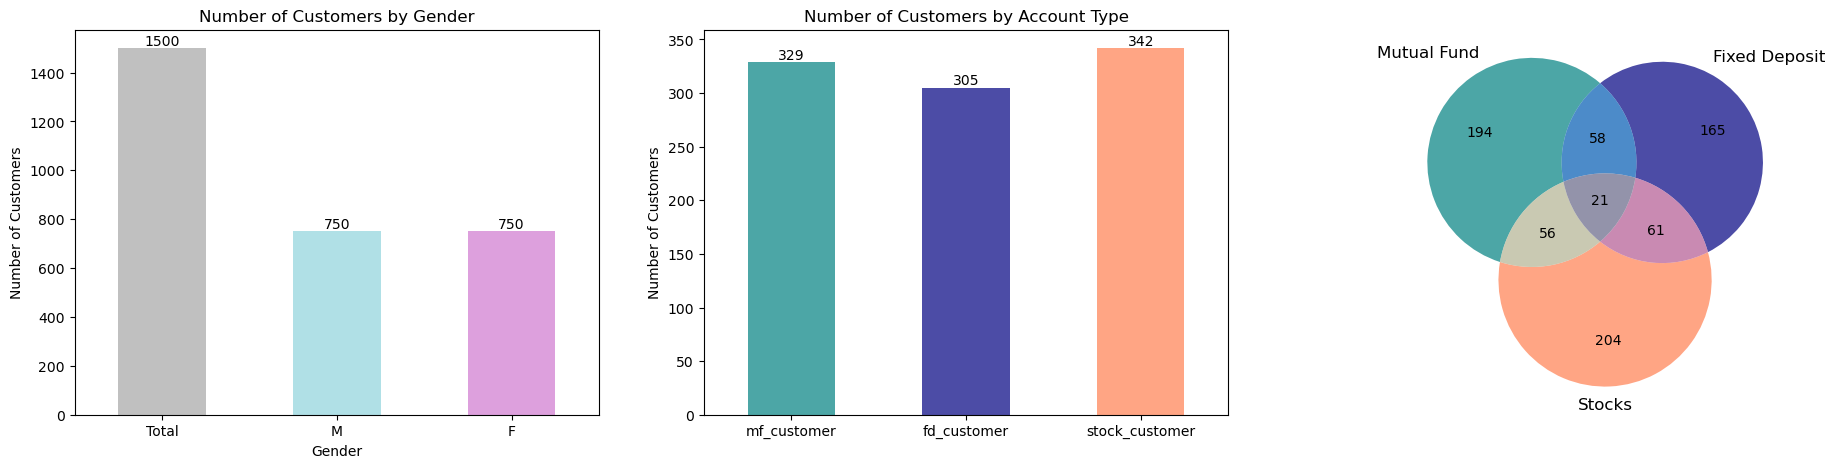

In [49]:
"""
Plotting Graphs
1) Number of Customers by Gender.
2) Number of Customers by Account Type.
3) Venn Diagram.
"""

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,10))

ax1 = gender_count.plot(kind='bar', color=['plum', 'powderblue', 'silver'] , figsize=(23,5),rot = 0, ax=ax1)
ax1.set_title('Number of Customers by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Customers')
ax1.bar_label(ax1.containers[0])
ax1.invert_xaxis()

ax2 = summary_of_customers_having_investment_accounts.plot(kind="bar", title="Number of Customers by Account Type",color=['teal', 'navy', 'coral'], figsize=(23,5),rot= 0,ax=ax2,alpha = 0.7)
ax2.set_ylabel('Number of Customers')
ax2.bar_label(ax2.containers[0])


vd = venn.venn3([set1, set2, set3], set_labels=['Mutual Fund', 'Fixed Deposit', 'Stocks'],set_colors=('teal', 'navy', 'coral'),alpha = 0.7, ax=ax3)
plt.tight_layout
plt.show()

# 1. Popular Investments

## Most people preferred Stocks as investment.

### Top 10 performing investments

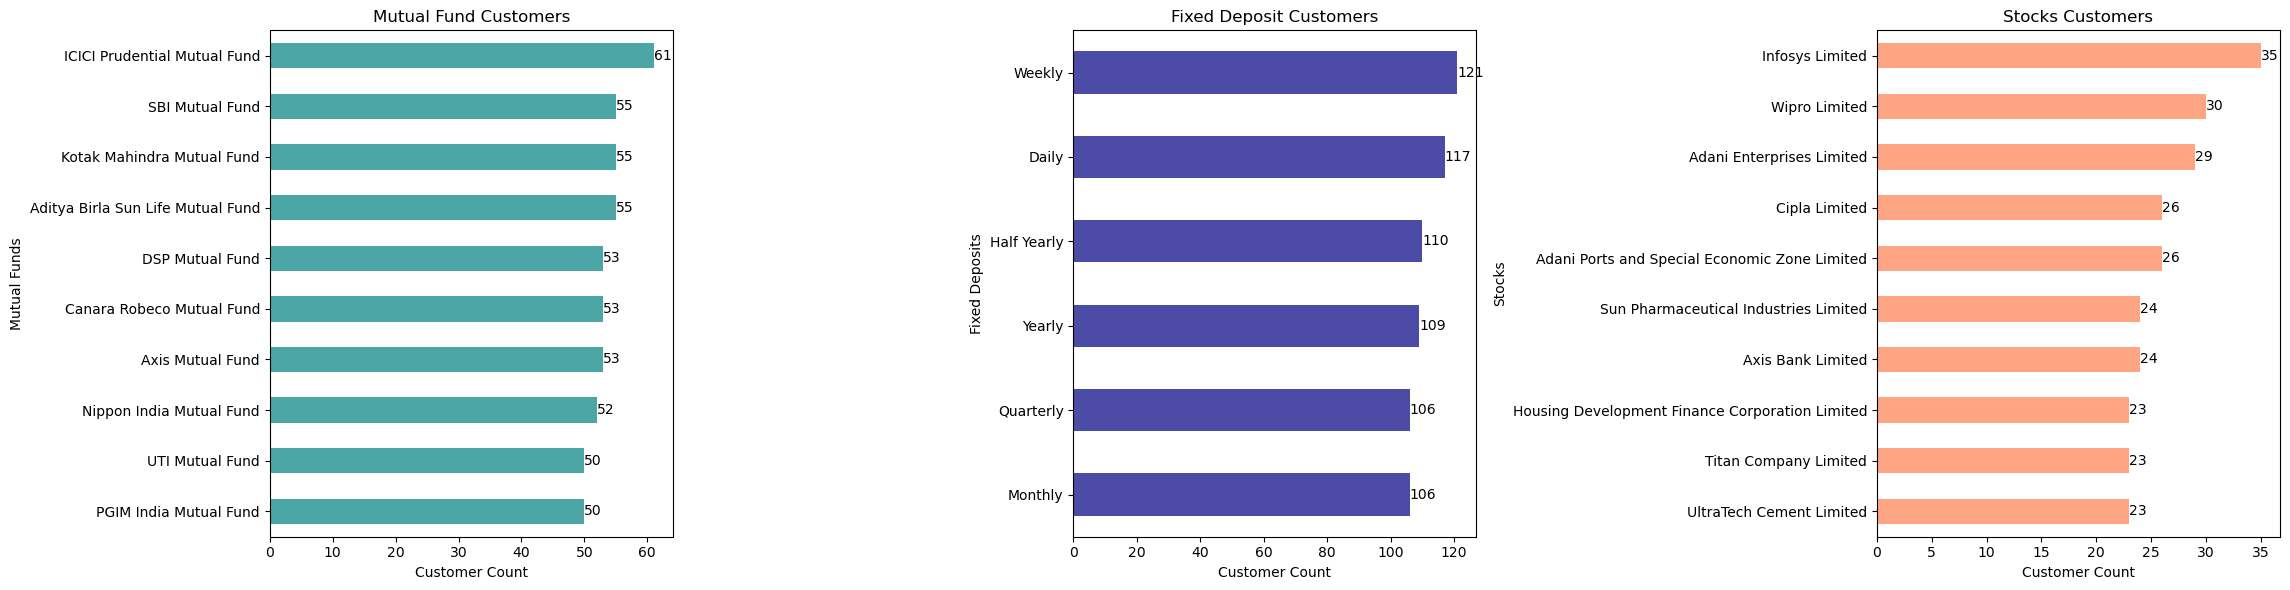

In [50]:
"""
Plotting Graphs
1) Top Mutual Funds with Customer count.
2) Top Fixed Deposit with Customer count.
3) Top Stocks with Customer count.
"""

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

MF_investment_top_10.plot.barh(color = "teal", alpha = 0.7 ,ax=axs[0], figsize=(23,6))
FD_investment_top_10.plot.barh(color = "navy", alpha = 0.7,ax=axs[1], figsize=(23,6))
stocks_investment_top_10.plot.barh(color = "coral", alpha = 0.7,ax=axs[2], figsize=(23,6))

#Set the titles
axs[0].set_title('Mutual Fund Customers')
axs[1].set_title('Fixed Deposit Customers')
axs[2].set_title('Stocks Customers')

# Set the x-axis and y-axis labels
axs[0].set_xlabel('Customer Count')
axs[0].set_ylabel('Mutual Funds')
axs[0].bar_label(axs[0].containers[0])


axs[1].set_xlabel('Customer Count')
axs[1].set_ylabel('Fixed Deposits')
axs[1].bar_label(axs[1].containers[0])


axs[2].set_xlabel('Customer Count')
axs[2].set_ylabel('Stocks')
axs[2].bar_label(axs[2].containers[0])


plt.tight_layout()
plt.show()

In [51]:
# fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# stocks_investment_top_10.plot.barh(ax=axs[2])
# FD_investment_top_10.plot.barh(ax=axs[1])
# MF_investment_top_10.plot.barh(ax=axs[0])

# #Set the titles
# axs[0].set_title('Mutual Fund Customers')
# axs[1].set_title('Fixed Deposit Customers')
# axs[2].set_title('Stocks Customers')

# # Set the x-axis and y-axis labels
# axs[0].set_xlabel('Customer Count')
# axs[0].set_ylabel('Mutual Funds')
# axs[1].set_xlabel('Customer Count')
# axs[1].set_ylabel('Fixed Deposits')
# axs[2].set_xlabel('Customer Count')
# axs[2].set_ylabel('Stocks')

# plt.tight_layout()
# plt.show()

# 2. Investments Performace

In [52]:
# ---Formula used to calculate Final Value of investment --- #
# ---------   FV = P * (1 + r) ^ t    ---------------------#
# ----------  r is RETURNS column  ---------------------#

In [53]:
"""
Calculating MF final amount using above formula.
After calculating MF final amount, calculate profit_per_day.
"""

TPI_MF = customers_investment_accounts_in_MF[["CUSTOMERID","age","GENDER", "FUNDNAME","INVESTMENTSTATUS","FUNDMANAGER","INVESTMENTDATE","INVESTMENTAMOUNT","RETURNS","cust_account_balance","mf_investment_start_date","mf_investment_days","mf_tenure"]]
TPI_MF['mf_final_value'] = TPI_MF["INVESTMENTAMOUNT"] * (1+ TPI_MF['RETURNS']/100) ** TPI_MF["mf_tenure"]

TPI_MF["mf_profit_per_day"] = (TPI_MF["mf_final_value"]-TPI_MF["INVESTMENTAMOUNT"]) / TPI_MF["mf_investment_days"]
TPI_MF = TPI_MF.sort_values(by = ["FUNDNAME","mf_profit_per_day"],ascending = False).drop_duplicates()
pd.options.display.float_format = '{:.2f}'.format



# TPI_MF

C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\1893744605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_MF['mf_final_value'] = TPI_MF["INVESTMENTAMOUNT"] * (1+ TPI_MF['RETURNS']/100) ** TPI_MF["mf_tenure"]
C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\1893744605.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_MF["mf_profit_per_day"] = (TPI_MF["mf_final_value"]-TPI_MF["INVESTMENTAMOUNT"]) / TPI_MF["mf_investment_days"]


In [54]:
TPI_MF_summary = TPI_MF.groupby('FUNDNAME').agg({'mf_profit_per_day': ['mean', 'min', 'max']})
TPI_MF_summary = TPI_MF_summary.round(decimals=2)

In [55]:
#-------------- IMP Data------------------------#
#---------Data used in 6th point------------#
TPI_MF_summary_all_mf = TPI_MF_summary.style.background_gradient(cmap='ocean_r')

In [56]:
TPI_MF_summary = TPI_MF_summary.sort_values(by=('mf_profit_per_day', 'mean'), ascending=False)

In [57]:
TPI_MF_top_10 = TPI_MF_summary.head(10)
TPI_MF_top_10 = TPI_MF_top_10.style.background_gradient(cmap='BuGn')


# TPI_MF_top_10

In [58]:
TPI_MF_bottom_10 = TPI_MF_summary.tail(10)
TPI_MF_bottom_10 = TPI_MF_bottom_10[::-1]
TPI_MF_bottom_10 = TPI_MF_bottom_10.style.background_gradient(cmap='OrRd_r')


# TPI_MF_bottom_10

### Top and Bottom Mutual Funds

In [59]:
"""
Displaying Data
1) Top 10 performing Mutual Funds.
2) Bottom 10 performing Mutual Funds.
"""


TPI_MF_top_10_html = TPI_MF_top_10.to_html()
TPI_MF_bottom_10_html = TPI_MF_bottom_10.to_html()

# display the styled DataFrames in one row and two columns
HTML(f'<table><tr><td>{TPI_MF_top_10_html}</td><td>{TPI_MF_bottom_10_html}</td></tr></table>')



In [60]:
"""
Calculating FD final amount using above formula.
After calculating FD final amount, calculate profit_per_day.
"""

TPI_FD = customers_investment_accounts_in_FD[["CUSTOMERID", "INTERESTPAYMENTFREQUENCY","INVESTMENTSTATUS","PRINCIPALAMOUNT","MATURITYAMOUNT","RETURNS","cust_account_balance","fd_investment_start_date","fd_investment_days","fd_tenure"]]

# print(len(TPI_FD))

TPI_FD['fd_final_value'] = TPI_FD['PRINCIPALAMOUNT'] * (1 + TPI_FD['RETURNS']/100) ** TPI_FD['fd_tenure']
TPI_FD["fd_investment_days"] = TPI_FD["fd_investment_days"].astype('float')
# TPI_FD['FD_final_value'] = TPI_FD['FD_final_value'].apply(lambda x: int(float(x)))
# TPI_FD["initial_value"] = TPI_FD["PRINCIPALAMOUNT"]
# TPI_FD["final_value"] = TPI_FD["initial_value"] * (1 + (TPI_FD["RETURNS"]/100))
# TPI_FD['final_value'] = TPI_FD['final_value'].apply(lambda x: int(float(x)))
# TPI_FD["profit"] = (TPI_FD["final_value"] - TPI_FD["initial_value"])*100/ TPI_FD["initial_value"]
TPI_FD["fd_profit_per_day"] = (TPI_FD["fd_final_value"] - TPI_FD['PRINCIPALAMOUNT'])/ TPI_FD["fd_investment_days"]
TPI_FD = TPI_FD.sort_values(by = ["INTERESTPAYMENTFREQUENCY","fd_profit_per_day"],ascending = False).drop_duplicates()
pd.options.display.float_format = '{:.2f}'.format


# TPI_FD

C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\183017636.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_FD['fd_final_value'] = TPI_FD['PRINCIPALAMOUNT'] * (1 + TPI_FD['RETURNS']/100) ** TPI_FD['fd_tenure']
C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\183017636.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_FD["fd_investment_days"] = TPI_FD["fd_investment_days"].astype('float')
C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\183017636.py:17: SettingWithCopyWarning: 
A value is t

In [61]:
TPI_FD_summary = TPI_FD.groupby('INTERESTPAYMENTFREQUENCY').agg({'fd_profit_per_day': ['mean', 'min', 'max']}) 

# -----------------IMP Data------------------#
#-------Data used in 6th point--------#
TPI_FD_summary_all_fd = TPI_FD_summary.style.background_gradient(cmap='ocean_r')

In [62]:
TPI_FD_summary = TPI_FD_summary.sort_values(by=('fd_profit_per_day', 'mean'), ascending=False)
TPI_FD_top_10 = TPI_FD_summary.head(10)
TPI_FD_top_10 = TPI_FD_top_10.style.background_gradient(cmap='BuGn')


# TPI_FD_top_10

In [63]:
TPI_FD_bottom_10 = TPI_FD_summary.tail(10)
TPI_FD_bottom_10 = TPI_FD_bottom_10[::-1]
TPI_FD_bottom_10 = TPI_FD_bottom_10.style.background_gradient(cmap='OrRd_r')


# TPI_FD_bottom_10

### Top and Bottom Fixed Deposits

In [64]:
"""
Displaying Data
1) Top 10 performing Fixed Deposits.
2) Bottom 10 performing Fixed Deposits.
"""

TPI_FD_top_10_html = TPI_FD_top_10.to_html()
TPI_FD_bottom_10_html = TPI_FD_bottom_10.to_html()

# display the styled DataFrames in one row and two columns
HTML(f'<table><tr><td>{TPI_FD_top_10_html}</td><td>{TPI_FD_bottom_10_html}</td></tr></table>')



In [65]:
"""
Calculate Stock Initial Value by multiplying PURCHASEPRICE * QUANTITY.
Calculating Stock final amount using above formula.
After calculating Stock final amount, calculate profit_per_day.
"""

TPI_stocks = customers_investment_accounts_in_stocks[["CUSTOMERID","STOCKID","STOCKNAME","STOCKSYMBOL","STOCKEXCHANGE","PURCHASEPRICE","PURCHASEDATE","QUANTITY","RETURNS","cust_account_balance","stock_investment_start_date","stock_investment_days","stock_tenure"]]
TPI_stocks['stock_initial_value'] = TPI_stocks["PURCHASEPRICE"]*TPI_stocks["QUANTITY"]
TPI_stocks['stock_final_value'] = TPI_stocks['stock_initial_value'] * (1+ TPI_stocks['RETURNS']/100) ** TPI_stocks["stock_tenure"]
TPI_stocks["stock_profit_per_day"] = (TPI_stocks["stock_final_value"] - TPI_stocks['stock_initial_value'] )/ TPI_stocks["stock_investment_days"]
TPI_stocks = TPI_stocks.sort_values(by = ["QUANTITY","stock_profit_per_day"],ascending = False).drop_duplicates()


# TPI_stocks

C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\2730117229.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_stocks['stock_initial_value'] = TPI_stocks["PURCHASEPRICE"]*TPI_stocks["QUANTITY"]
C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\2730117229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_stocks['stock_final_value'] = TPI_stocks['stock_initial_value'] * (1+ TPI_stocks['RETURNS']/100) ** TPI_stocks["stock_tenure"]
C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\2730117229.py:10: 

In [66]:
TPI_stock_summary =TPI_stocks.groupby('STOCKNAME').agg({'stock_profit_per_day': ['mean', 'min', 'max']}) 

In [67]:
# ----------------------IMP Data--------------------#
#-----------Data used in 6th point-----------#
TPI_stock_summary_all_stocks = TPI_stock_summary.style.background_gradient(cmap='ocean_r')

In [68]:
TPI_stock_summary = TPI_stock_summary.sort_values(by=('stock_profit_per_day', 'mean'), ascending=False)

In [69]:
TPI_stock_top_10 = TPI_stock_summary.head(10)
TPI_stock_top_10 = TPI_stock_top_10.style.background_gradient(cmap='BuGn')


# TPI_stock_top_10

In [70]:
TPI_stock_bottom_10 = TPI_stock_summary.tail(10)
TPI_stock_bottom_10 = TPI_stock_bottom_10[::-1]
TPI_stock_bottom_10 = TPI_stock_bottom_10.style.background_gradient(cmap='OrRd_r')


# TPI_stock_bottom_10

### Top and Bottom Stocks

In [71]:
"""
Displaying Data
1) Top 10 performing Stocks.
2) Bottom 10 performing Stocks.
"""

TPI_stock_top_10_html = TPI_stock_top_10.to_html()
TPI_stock_bottom_10_html = TPI_stock_bottom_10.to_html()

# display the styled DataFrames in one row and two columns
HTML(f'<table><tr><td>{TPI_stock_top_10_html}</td><td>{TPI_stock_bottom_10_html}</td></tr></table>')



# 3. Identifying High-Net-Worth Investors

In [72]:
#--------After calculation of gains it is seen that customers who invested in Mutual Funds are more profitable.------------------#
#-------RCA - In data we can see tenure for Mutual Funds is way more as compared to tenure of Fixed Deposit and Stocks ---------#

In [73]:
"""
Identifying high net worth worth investors on pure basis of amount in account and not on investment.
"""

customers_investment_accounts = pd.merge(customers, investment_accounts, how ="outer",indicator="customers_investment_accounts")
customers_investment_accounts['customer_have_investment_account'] = customers_investment_accounts['customers_investment_accounts'].apply(lambda x: 'Yes' if x == 'both' else 'No')
customers_investment_accounts = customers_investment_accounts[customers_investment_accounts["customer_have_investment_account"] == "No"]
customers_investment_accounts = customers_investment_accounts[["CUSTOMERID","FIRSTNAME","LASTNAME","GENDER","age"]].reset_index()


# customers_investment_accounts

In [74]:
customers_accountbalancesum = customers_accounts[["CUSTOMERID","FIRSTNAME","LASTNAME","age","cust_account_balance"]]
customers_investment_accounts_account_balance = pd.merge(customers_investment_accounts, customers_accountbalancesum, how ="inner")

In [75]:



# plt.ticklabel_format(style='plain')

# plt.scatter(customers_investment_accounts_account_balance["age"], customers_investment_accounts_account_balance["cust_account_balance"])
# plt.axvspan(40, 80, ymin = 0.64, ymax = 0.98, ec ='darkgreen', fill=False, label = "rich_people", linewidth=2)
# # plt.axvspan(15, 25, ymin = 0.01, ymax = 0.25, ec ='red', fill=False, label = "education_loan", linewidth=2)
# plt.legend(loc="upper right")



In [76]:
customers_investment_accounts_account_balance = customers_investment_accounts_account_balance[(customers_investment_accounts_account_balance["age"] >= 40) & (customers_investment_accounts_account_balance["age"] <= 80)]
customers_investment_accounts_account_balance = customers_investment_accounts_account_balance[(customers_investment_accounts_account_balance["cust_account_balance"] >= 15000000)]
customers_investment_accounts_account_balance = customers_investment_accounts_account_balance.drop_duplicates().reset_index(drop=True)
customers_investment_accounts_account_balance = customers_investment_accounts_account_balance.sort_values(["cust_account_balance","CUSTOMERID"],ascending = [True,True])


# customers_investment_accounts_account_balance

In [77]:

#---------------------------------Identifying high net worth worth investors on basis of gains in different investments--------------------------------#


In [78]:
TPI_MF.sort_values("CUSTOMERID", ascending = True)
mf_final_investment_customers = TPI_MF.groupby(by=['CUSTOMERID']).agg({'mf_final_value': 'sum'}).rename(columns={'mf_final_value': 'mf_final_investment_amount'})


# mf_final_investment_customers

In [79]:
TPI_FD.reset_index(drop=True)
TPI_FD.sort_values(["CUSTOMERID"],ascending = [False])
fd_final_investment_customers = TPI_FD.groupby(by=['CUSTOMERID']).agg({'fd_final_value': 'sum'}).rename(columns={'fd_final_value': 'fd_final_investment_amount'})


# fd_final_investment_customers

In [80]:
TPI_stocks.reset_index(drop=True)
TPI_stocks.sort_values(["CUSTOMERID"],ascending = [False])
stock_final_investment_customers = TPI_stocks.groupby(by=['CUSTOMERID']).agg({'stock_final_value': 'sum'}).rename(columns={'stock_final_value': 'stock_final_investment_amount'})


# stock_final_investment_customers

In [81]:
customers_account_balance
customer_details = pd.merge(customers, accounts, how ="inner")
customer_details = customer_details[["CUSTOMERID","GENDER","age"]].drop_duplicates()
customer_details = pd.merge(customer_details, customers_account_balance, how ="inner", on = "CUSTOMERID")


# customer_details

In [82]:
"""
Collating customer data gains in different investments.
"""
collating_customer_details_investments = pd.merge(customer_details, mf_final_investment_customers, how ="left", on = "CUSTOMERID")
collating_customer_details_investments = pd.merge(collating_customer_details_investments, fd_final_investment_customers, how ="left", on = "CUSTOMERID")
collating_customer_details_investments = pd.merge(collating_customer_details_investments, stock_final_investment_customers, how ="left", on = "CUSTOMERID")
collating_customer_details_investments = collating_customer_details_investments.fillna(0)


# collating_customer_details_investments

In [83]:
"""
Collating customer data gains in different investments, calculating sum of gains of different investments and sum of gains of different investments + account_balance. 
"""
collating_customer_details_investments["account_balance_considering_profits"] = collating_customer_details_investments["mf_final_investment_amount"] + collating_customer_details_investments["fd_final_investment_amount"]+collating_customer_details_investments["stock_final_investment_amount"]
collating_customer_details_investments["account_balance_considering_profits_and_initial_acnt_bal"] = collating_customer_details_investments["cust_account_balance"] + collating_customer_details_investments["mf_final_investment_amount"] + collating_customer_details_investments["fd_final_investment_amount"]+collating_customer_details_investments["stock_final_investment_amount"]


# collating_customer_details_investments

In [84]:
rich_customers_in_investment = collating_customer_details_investments.sort_values(["account_balance_considering_profits"],ascending = [False]).reset_index(drop = True)
top_rich_customers = rich_customers_in_investment.head(10)


# display(top_rich_customers)

In [85]:
top_rich_customers = top_rich_customers.head(5)
top_rich_customers_list = top_rich_customers['CUSTOMERID'].unique().tolist()


# top_rich_customers

In [86]:


# plt.ticklabel_format(style='plain')
# plt.scatter(collating_customer_details_investments["age"], collating_customer_details_investments["account_balance_considering_profits"])
# plt.axvspan(20, 80, ymin = 0.39, ymax = 0.98, ec ='darkgreen', fill=False, label = "rich_people", linewidth=2)
# plt.legend(loc="upper right")



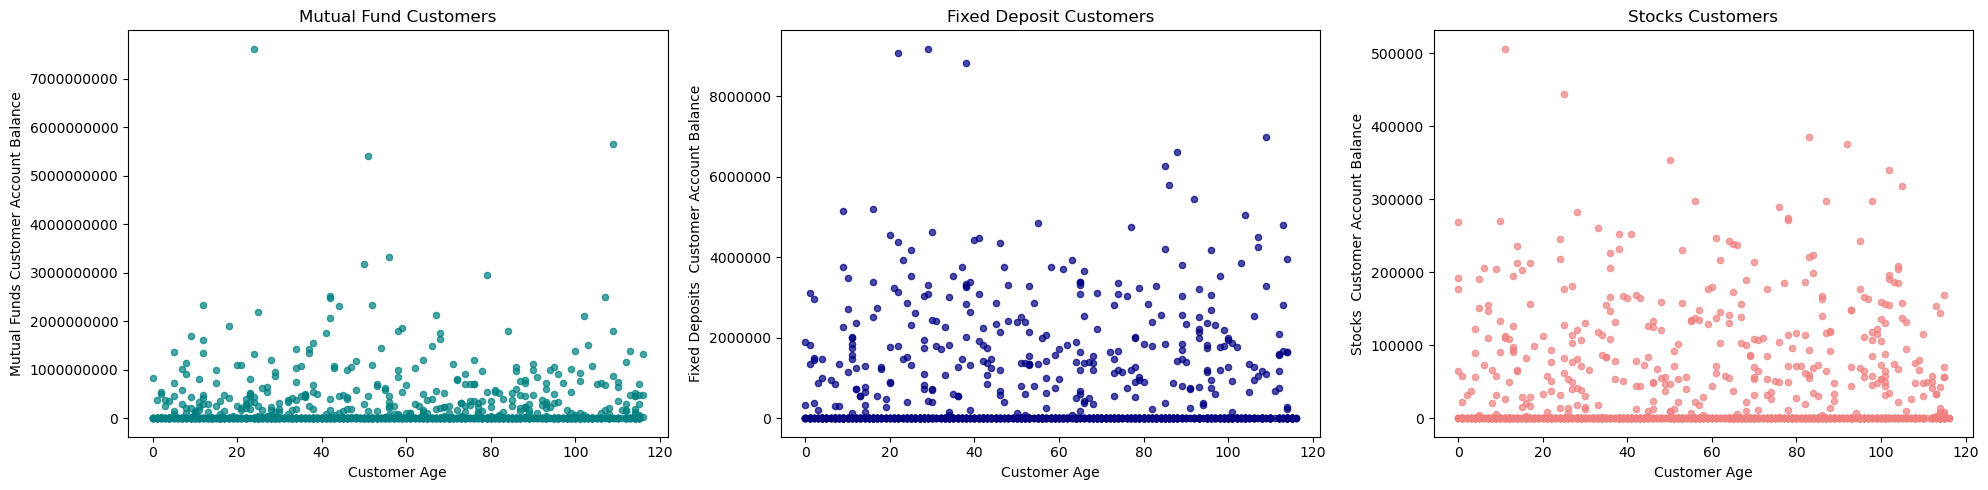

In [87]:
"""
Plotting Graphs
1) Mutual Funds Customers (age) with Gains.
2) Fixed Deposit Customers (age)  with Gains.
3) Stocks with Customes (age)  with Gains.
"""

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

collating_customer_details_investments.plot(kind='scatter',x='age',y='mf_final_investment_amount',ax=axs[0],color = "teal", alpha = 0.7);axs[0].ticklabel_format(style='plain',axis = 'y')
collating_customer_details_investments.plot(kind='scatter',x='age',y='fd_final_investment_amount',ax=axs[1],color = "navy", alpha = 0.7);axs[1].ticklabel_format(style='plain')
collating_customer_details_investments.plot(kind='scatter',x='age',y='stock_final_investment_amount',ax=axs[2],color = "lightcoral", alpha = 0.7);axs[2].ticklabel_format(style='plain')

#Set the titles
axs[0].set_title('Mutual Fund Customers')
axs[1].set_title('Fixed Deposit Customers')
axs[2].set_title('Stocks Customers')

# Set the x-axis and y-axis labels
axs[0].set_xlabel('Customer Age')
axs[0].set_ylabel('Mutual Funds Customer Account Balance')
axs[1].set_xlabel('Customer Age')
axs[1].set_ylabel('Fixed Deposits  Customer Account Balance')
axs[2].set_xlabel('Customer Age')
axs[2].set_ylabel('Stocks  Customer Account Balance')

plt.tight_layout()
plt.show()

### High Net Worth Investors List

In [88]:
"""
Displaying top rich customers (customers who got highest gain in investments)
"""

top_rich_customers

,CUSTOMERID,GENDER,age,cust_account_balance,mf_final_investment_amount,fd_final_investment_amount,stock_final_investment_amount,account_balance_considering_profits,account_balance_considering_profits_and_initial_acnt_bal
0,2338,F,24,7857953,7616857425.83,0.00,0.00,7616857425.83,7624715378.83
1,2129,F,109,5445340,5649132200.16,0.00,0.00,5649132200.16,5654577540.16
2,1559,M,51,9953933,5404980049.56,0.00,0.00,5404980049.56,5414933982.56
3,1056,F,56,10559163,3324008628.84,0.00,0.00,3324008628.84,3334567791.84
4,2377,F,50,1785838,3176613732.52,0.00,0.00,3176613732.52,3178399570.52


# 4. Historical Returns

In [89]:
# ----------------As we can see top customers are the ones who invested in Mutual Funds, therefore considering MF data.--------------------------------#


In [90]:
"""
Calculating historical data for past 6 months.
Therefore calculating amount for past 6,7,8,9,10,11 months.
mf_final_value is Total Final Amount.
"""

rich_customers = TPI_MF[TPI_MF['CUSTOMERID'].isin(top_rich_customers_list)].reset_index(drop = True)
# rich_customers = rich_customers[["CUSTOMERID","FUNDNAME","INVESTMENTAMOUNT","mf_final_value"]]
# rich_customers = rich_customers[rich_customers["CUSTOMERID"] == int("1640")]
rich_customers.loc[:, "fv_6_month_ago"] = "NA"
rich_customers.loc[:, "fv_7_month_ago"] = "NA"
rich_customers.loc[:, "fv_8_month_ago"] = "NA"
rich_customers.loc[:, "fv_9_month_ago"] = "NA"
rich_customers.loc[:, "fv_10_month_ago"] = "NA"
rich_customers.loc[:, "fv_11_month_ago"] = "NA"


# rich_customers

In [91]:
"""
Below logic is the implementation of calculation of past months value and then storing those values in diiferent columns.
"""

for i in range(len(rich_customers)):
    count = 6
    k = 6
    for j in range(6,12):
        tenure = k/12
        column_string = "fv_" + str(count) + "_month_ago"
        count = count + 1
        k = k - 1
        rich_customers[column_string].iloc[i] = rich_customers["INVESTMENTAMOUNT"].iloc[i] *  (1+ rich_customers['RETURNS'].iloc[i]/100) ** (rich_customers["mf_tenure"].iloc[i] - tenure)
        
        
# rich_customers

C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\3658435155.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rich_customers[column_string].iloc[i] = rich_customers["INVESTMENTAMOUNT"].iloc[i] *  (1+ rich_customers['RETURNS'].iloc[i]/100) ** (rich_customers["mf_tenure"].iloc[i] - tenure)
C:\Users\pbone\AppData\Local\Temp\ipykernel_15588\3658435155.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rich_customers[column_string].iloc[i] = rich_customers["INVESTMENTAMOUNT"].iloc[i] *  (1+ rich_customers['RETURNS'].iloc[i]/100) ** (rich_customers["mf_tenure"].iloc[i] - tenure)
C:\Users\pbone\AppData\Local\Temp\ipyker

Total returns for the past six months on a monthly basis for the top 5 customers with the highest portfolios.


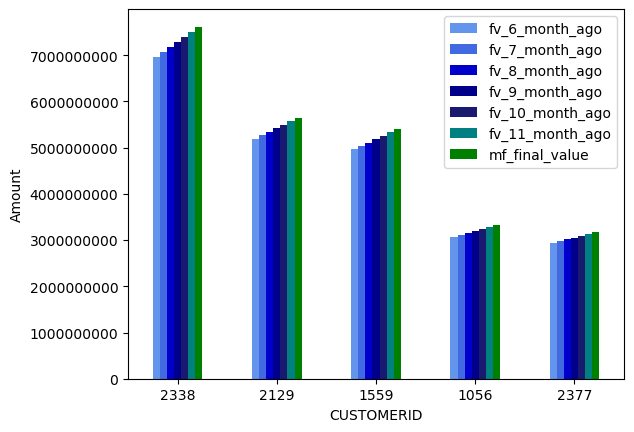

In [92]:
"""
Plotting Graph for Historical return of High Net worth Investors (In our case high net investors are of Mutual Funds)
"""

print("Total returns for the past six months on a monthly basis for the top 5 customers with the highest portfolios.")
rich_customers = rich_customers.groupby('CUSTOMERID')[['fv_6_month_ago', 'fv_7_month_ago', 'fv_8_month_ago', 'fv_9_month_ago','fv_10_month_ago','fv_11_month_ago','mf_final_value']].sum().reset_index()
rich_customers = rich_customers.sort_values(["mf_final_value"],ascending = [False])
rich_customers.plot(x='CUSTOMERID', y=['fv_6_month_ago', 'fv_7_month_ago', 'fv_8_month_ago', 'fv_9_month_ago','fv_10_month_ago','fv_11_month_ago','mf_final_value'], kind='bar',rot = 0,color = ["cornflowerblue","royalblue","mediumblue","darkblue","midnightblue","teal","green"])
# ax.yaxis.set_major_formatter(formatter)
plt.ticklabel_format (axis='y', style='plain')
plt.ylabel("Amount");

# 5. Tax Calculation on Investments

### Tax on Mutual Fund

In [93]:
#-----------Customize tax data by passing customer in customer_list----------------#
"""

Customize customer list data for Tax calculation.
To filter data for some customer in list update customers.

"""

# customer_list = ["1640","2377"]
customer_list = None


In [94]:
tax_on_MF = TPI_MF.reset_index(drop = True)
tax_on_MF["gains"] = tax_on_MF["mf_final_value"] - tax_on_MF["INVESTMENTAMOUNT"]
tax_on_MF['tax_rdm_within_1_year'] = tax_on_MF['gains'] * 0.15
tax_on_MF['tax_rdm_after_1_year'] = tax_on_MF.apply(lambda x: (x['gains']- 100000) * 0.1 if (x['gains']) >= 100000 else 0, axis=1)
tax_on_MF["CUSTOMERID"] = tax_on_MF["CUSTOMERID"].astype(str)


# print(len(tax_on_MF))

In [95]:
if customer_list is not None:
    tax_on_MF_customized = tax_on_MF[tax_on_MF["CUSTOMERID"].isin(customer_list)]
    if len(tax_on_MF_customized)>0 :
        display(tax_on_MF_customized)
    else :
        display(tax_on_MF_customized)
else:
    tax_on_MF_customized = tax_on_MF
    display(tax_on_MF_customized)

,CUSTOMERID,age,GENDER,FUNDNAME,INVESTMENTSTATUS,FUNDMANAGER,INVESTMENTDATE,INVESTMENTAMOUNT,RETURNS,cust_account_balance,mf_investment_start_date,mf_investment_days,mf_tenure,mf_final_value,mf_profit_per_day,gains,tax_rdm_within_1_year,tax_rdm_after_1_year
0,1640,12,F,UTI Mutual Fund,Closed,Ankit Agarwal,2006-02-26 00:41:06,88350565,16.21,17406092,2006-02-26 00:41:06,6495,17.80,1280430050.77,183538.03,1192079485.77,178811922.87,119197948.58
1,2377,50,F,UTI Mutual Fund,Active,Ankit Agarwal,2007-04-23 17:46:22,60654587,17.11,1785838,2007-04-23 17:46:22,6074,16.64,840208906.36,128342.83,779554319.36,116933147.90,77945431.94
2,2330,25,M,UTI Mutual Fund,Active,Ankit Agarwal,2005-04-08 08:24:37,27525475,19.67,4019786,2005-04-08 08:24:37,6819,18.68,788506102.28,111597.10,760980627.28,114147094.09,76088062.73
3,1646,37,F,UTI Mutual Fund,Closed,Ankit Agarwal,2004-10-13 14:05:10,67423157,13.59,7044434,2004-10-13 14:05:10,6996,19.17,775494781.72,101210.92,708071624.72,106210743.71,70797162.47
4,1412,100,M,UTI Mutual Fund,Active,Ankit Agarwal,2006-04-16 14:55:54,95301418,11.91,6998457,2006-04-16 14:55:54,6446,17.66,695320583.10,93083.95,600019165.10,90002874.76,59991916.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1174,42,F,Aditya Birla Sun Life Mutual Fund,Closed,Bhupesh Bameta,2016-03-02 03:44:04,9885288,10.34,2764295,2016-03-02 03:44:04,2838,7.78,21249521.48,4004.31,11364233.48,1704635.02,1126423.35
833,1972,88,M,Aditya Birla Sun Life Mutual Fund,Closed,Bhupesh Bameta,2008-06-28 00:41:51,7897604,8.71,6477833,2008-06-28 00:41:51,5642,15.46,28722789.46,3691.10,20825185.46,3123777.82,2072518.55
834,1395,88,M,Aditya Birla Sun Life Mutual Fund,Closed,Bhupesh Bameta,2015-03-25 10:42:04,5309157,11.30,5132415,2015-03-25 10:42:04,3181,8.72,13499008.98,2574.62,8189851.98,1228477.80,808985.20
835,1217,68,F,Aditya Birla Sun Life Mutual Fund,Active,Bhupesh Bameta,2008-02-09 02:45:44,4151126,7.44,10696013,2008-02-09 02:45:44,5782,15.84,12940265.30,1520.09,8789139.30,1318370.90,868913.93


### Tax on Fixed Deposit

In [96]:
tax_on_FD = TPI_FD.reset_index(drop = True)
tax_on_FD["gains"] = tax_on_FD["fd_final_value"] - tax_on_FD["PRINCIPALAMOUNT"]
tax_on_FD['tax_rdm_within_1_year'] = tax_on_FD['gains'] * 0.15
tax_on_FD['tax_rdm_after_1_year'] = tax_on_FD.apply(lambda x: (x['gains']- 100000) * 0.1 if (x['gains']) >= 100000 else 0, axis=1)


# print(len(tax_on_FD))

In [97]:
if customer_list is not None:
    tax_on_FD_customized = tax_on_FD[tax_on_FD["CUSTOMERID"].isin(customer_list)]
    if len(tax_on_FD_customized) > 0 :
        display("tax_on_FD_customized")
    else :
        display("No Fixed Deposit Customer")
else :
    tax_on_FD_customized = tax_on_FD
    display(tax_on_FD_customized)

,CUSTOMERID,INTERESTPAYMENTFREQUENCY,INVESTMENTSTATUS,PRINCIPALAMOUNT,MATURITYAMOUNT,RETURNS,cust_account_balance,fd_investment_start_date,fd_investment_days,fd_tenure,fd_final_value,fd_profit_per_day,gains,tax_rdm_within_1_year,tax_rdm_after_1_year
0,2258,Yearly,Closed,878409,7052177,17.58,6134661,2019-08-15 20:24:15,1577.00,4.32,1768481.27,564.41,890072.27,133510.84,79007.23
1,1185,Yearly,Closed,809528,6035713,17.87,5519554,2019-11-26 17:58:04,1474.00,4.04,1572637.47,517.71,763109.47,114466.42,66310.95
2,2014,Yearly,Closed,693991,1668505,18.84,10346525,2019-03-23 12:22:23,1722.00,4.72,1567141.38,507.06,873150.38,130972.56,77315.04
3,1459,Yearly,Closed,853495,2920485,19.33,4662071,2021-10-07 21:29:12,793.00,2.17,1253039.74,503.84,399544.74,59931.71,29954.47
4,2074,Yearly,Closed,814539,4115228,18.82,5337974,2021-01-17 02:03:32,1056.00,2.90,1342028.32,499.52,527489.32,79123.40,42748.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,2024,Daily,Closed,53690,4195982,6.20,3727718,2018-10-12 16:26:43,1884.00,5.16,73241.93,10.38,19551.93,2932.79,0.00
813,2273,Daily,Closed,24874,3165715,12.39,1767044,2020-02-21 11:39:35,1387.00,3.80,38777.44,10.02,13903.44,2085.52,0.00
814,1029,Daily,Active,43784,8176010,6.10,2246532,2022-06-20 11:44:44,537.00,1.47,47773.07,7.43,3989.07,598.36,0.00
815,1701,Daily,Active,14407,6855853,13.97,6958611,2021-02-18 10:36:28,1024.00,2.81,20796.09,6.24,6389.09,958.36,0.00


### Tax on Stocks

In [98]:
tax_on_stocks = TPI_stocks.reset_index(drop = True)
tax_on_stocks["gains"] = tax_on_stocks["stock_final_value"] - tax_on_stocks["stock_initial_value"]
tax_on_stocks['tax_on_stocks'] = tax_on_stocks['gains'] * 0.10


# print(len(tax_on_stocks))

In [99]:
if customer_list is not None:
    tax_on_stocks_customized = tax_on_stocks[tax_on_stocks["CUSTOMERID"].isin(customer_list)]
    if len(tax_on_stocks_customized)>0 :
        display(tax_on_stocks_customized)
    else :
        display("No Stock Customers")
else :
    tax_on_stocks_customized = tax_on_stocks
    display(tax_on_stocks_customized)

,CUSTOMERID,STOCKID,STOCKNAME,STOCKSYMBOL,STOCKEXCHANGE,PURCHASEPRICE,PURCHASEDATE,QUANTITY,RETURNS,cust_account_balance,stock_investment_start_date,stock_investment_days,stock_tenure,stock_initial_value,stock_final_value,stock_profit_per_day,gains,tax_on_stocks
0,1221,2665,Cipla Limited,CIPLA,BSE,694,2020-08-27 05:28:44,100,14.89,4692240,2020-08-27 05:28:44,1199,3.29,69400,109523.24,33.46,40123.24,4012.32
1,1160,2902,Hindustan Petroleum Corporation Limited,HINDPETRO,NSE,404,2020-06-22 04:07:19,100,18.94,2264515,2020-06-22 04:07:19,1265,3.47,40400,73725.17,26.34,33325.17,3332.52
2,2320,1318,Bajaj Finance Limited,BAJFINANCE,NSE,928,2020-03-16 16:12:34,100,7.83,613216,2020-03-16 16:12:34,1363,3.74,92800,122979.54,22.14,30179.54,3017.95
3,2339,1071,Adani Green Energy Limited,ADANIGREEN,NSE,815,2019-09-04 09:37:33,100,8.46,7245686,2019-09-04 09:37:33,1557,4.27,81500,115256.33,21.68,33756.33,3375.63
4,1727,2205,Hindustan Unilever Limited,HINDUNILVR,BSE,322,2022-12-31 03:55:39,100,14.57,9284870,2022-12-31 03:55:39,343,0.94,32200,36601.44,12.83,4401.44,440.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1046,3988,IndusInd Bank Limited,INDUSINDBK,NSE,390,2023-08-27 22:41:30,1,15.11,3628489,2023-08-27 22:41:30,104,0.29,390,405.96,0.15,15.96,1.60
916,1802,1003,Bajaj Auto Limited,BAJAJ-AUTO,BSE,419,2020-09-13 09:53:08,1,6.40,16766955,2020-09-13 09:53:08,1182,3.24,419,512.27,0.08,93.27,9.33
917,1085,3647,Cipla Limited,CIPLA,BSE,152,2020-11-30 08:36:48,1,15.65,2258879,2020-11-30 08:36:48,1104,3.03,152,236.02,0.08,84.02,8.40
918,2226,1797,State Bank of India,SBIN,NSE,332,2021-04-29 09:44:18,1,7.41,14890936,2021-04-29 09:44:18,954,2.62,332,400.25,0.07,68.25,6.82


In [100]:

#------------------------------------------Few use cases that are not listed in the problem statement.-------------------------------------#


# 6. Analysis of Profitable and Non Profitable Investments

## Mutual Fund Investments

In [101]:
TPI_MF_summary_all_mf

## Stocks Investments

In [102]:
TPI_stock_summary_all_stocks

## Fixed Deposit Investments

In [103]:
TPI_FD_summary_all_fd

# 7. Customers With No Investment Accounts

In [104]:
"""
Below Data is for customers who have no investments but according their account balance they seem to be rich.
The customers belonging to this category and age in between 40 and 80 can be targeted for new schemes.
"""
customers_account_balance = customers_accounts.groupby(by=['CUSTOMERID',"age"]).agg({'ACCOUNTBALANCE': 'sum'}).rename(columns={'ACCOUNTBALANCE': 'cust_account_balance'}).reset_index()


# customers_account_balance

In [105]:
investment_accounts_data = investment_accounts[["CUSTOMERID"]].drop_duplicates()
investment_accounts_data["cust_have_instmt_acc"] = 1
customers_no_investment = pd.merge(customers_account_balance,investment_accounts_data, how = "left", on = "CUSTOMERID")
customers_no_investment = customers_no_investment.fillna(0)


# customers_no_investment

In [106]:
customers_no_investment = customers_no_investment[customers_no_investment["cust_have_instmt_acc"] == 0]


# customers_no_investment

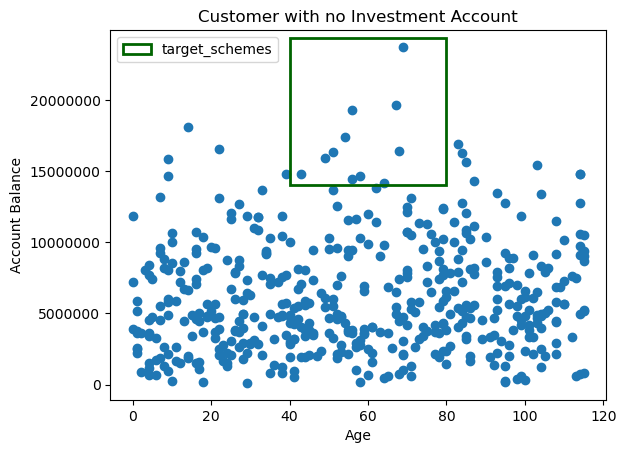

In [107]:
plt.ticklabel_format(style='plain')

plt.scatter(customers_no_investment["age"], customers_no_investment["cust_account_balance"])
plt.axvspan(40, 80, ymin = 0.58, ymax = 0.98, ec ='darkgreen', fill=False, label = "target_schemes", linewidth=2)
plt.legend(loc="upper left")
plt.xlabel("Age")
plt.ylabel("Account Balance")
plt.title("Customer with no Investment Account");

In [108]:
customers_no_investment = customers_no_investment[(customers_no_investment["age"] >= 40) & (customers_no_investment["age"] <= 80)]
customers_no_investment = customers_no_investment[(customers_no_investment["cust_account_balance"] >= 14000000)]
customers_no_investment = customers_no_investment.sort_values(["cust_account_balance","CUSTOMERID"],ascending = [False,True])
customers_no_investment.drop(['cust_have_instmt_acc'], axis=1).reset_index(drop = True)

,CUSTOMERID,age,cust_account_balance
0,1870,69,23713697
1,1656,67,19639999
2,2125,56,19296345
3,1447,54,17387610
4,1067,68,16432929
5,2192,51,16302995
6,1879,49,15935737
7,2224,43,14768789
8,1069,58,14635585
9,2438,56,14420422
